In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import preprocessing
import warnings

In [53]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [54]:
data = pd.read_csv("Crop_recommendation.csv")

## Análisis Descriptivo

In [55]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [57]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Valores Nulos

<Axes: >

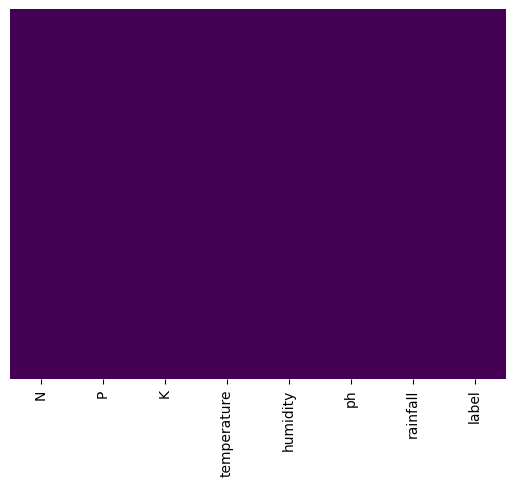

In [58]:
sbn.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

No se ven valores nulos en ninguna columna

In [59]:
datax = data.drop("label", axis=1)
scaler = preprocessing.StandardScaler()
dataxScaled = pd.DataFrame(scaler.fit_transform(datax), columns=datax.columns)

In [60]:
dataxScaled

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


### Outliers

<Axes: >

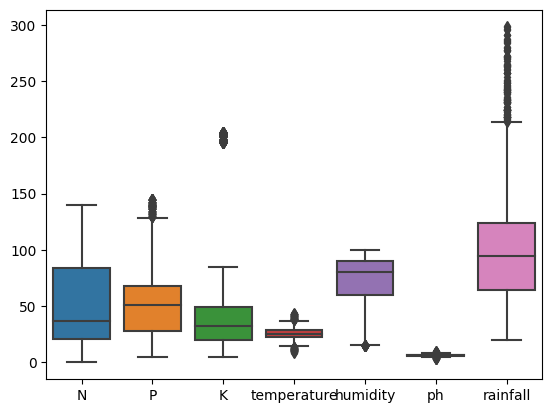

In [61]:
sbn.boxplot(datax)

Se ven valores atípicos en todas las variables menos la **N**. La que más tiene es **Rainfall**

/home/simon/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


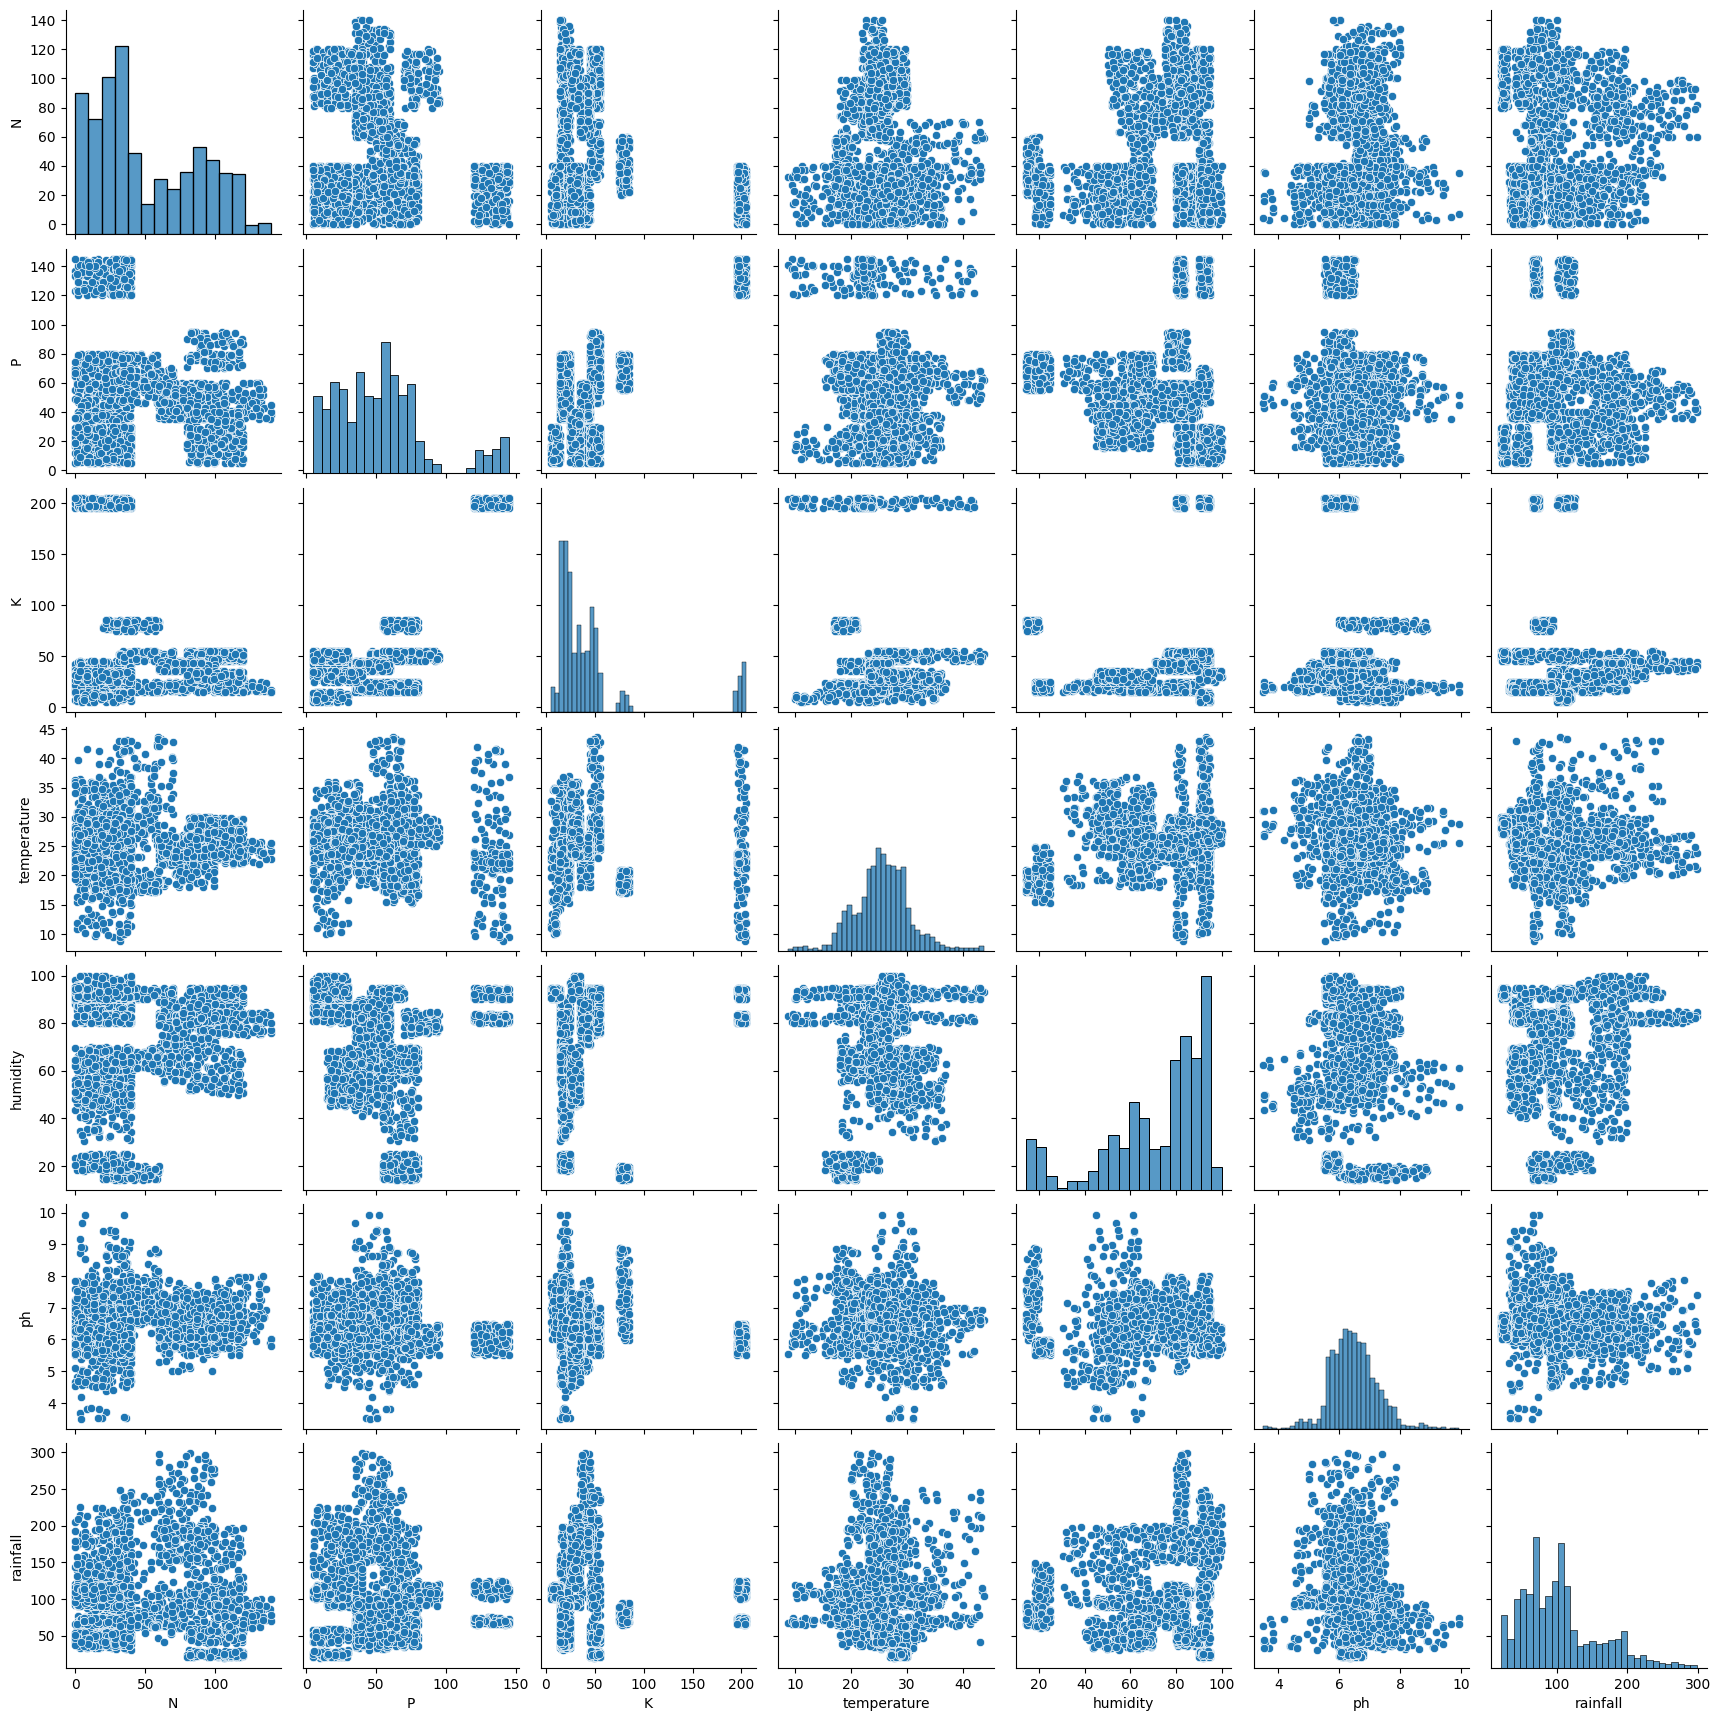

In [62]:
sbn.pairplot(datax)

## Correlación Lineal
Para poder generar una proyección PCA, debemos ver si existe correlación **lineal** entre las variables

<Axes: >

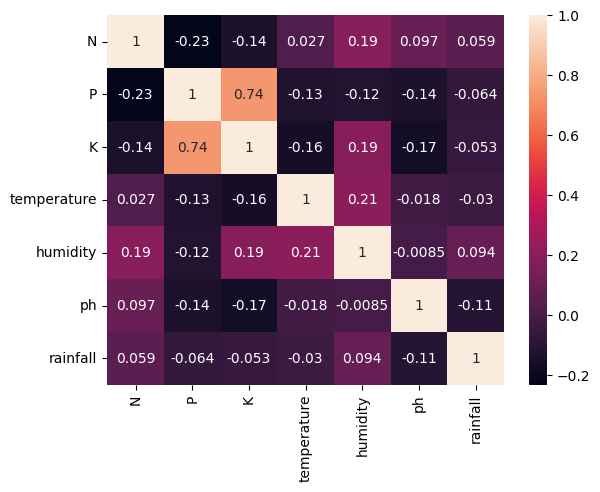

In [63]:
sbn.heatmap(datax.corr(), annot=True)

No se ve mucha correlación lineal entre los datos. En el único caso que está presente es en K con P

### Eliminar valores atípicos

In [87]:
qmin = 0.10
qmax = 1 - qmin
quant_datax = datax.quantile([qmin, qmax])
datax_nuevo = datax.apply(lambda x: x[(x >= quant_datax.loc[qmin, x.name]) & (x <= quant_datax.loc[qmax, x.name])], axis=0).dropna()
datax_nuevo.reset_index(inplace=True, drop=True)

In [88]:
datax_nuevo.head()

,N,P,K,temperature,humidity,ph,rainfall
0,93.0,56.0,36.0,24.014976,82.056872,6.984354,185.277339
1,89.0,45.0,36.0,21.325042,80.474764,6.442475,185.497473
2,91.0,35.0,38.0,24.897282,80.525861,6.134287,183.679321
3,99.0,41.0,36.0,24.458021,82.748356,6.738652,182.561632
4,68.0,57.0,43.0,26.088679,80.379799,5.706943,182.904350


In [89]:
datax_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            531 non-null    float64
 1   P            531 non-null    float64
 2   K            531 non-null    float64
 3   temperature  531 non-null    float64
 4   humidity     531 non-null    float64
 5   ph           531 non-null    float64
 6   rainfall     531 non-null    float64
dtypes: float64(7)
memory usage: 29.2 KB


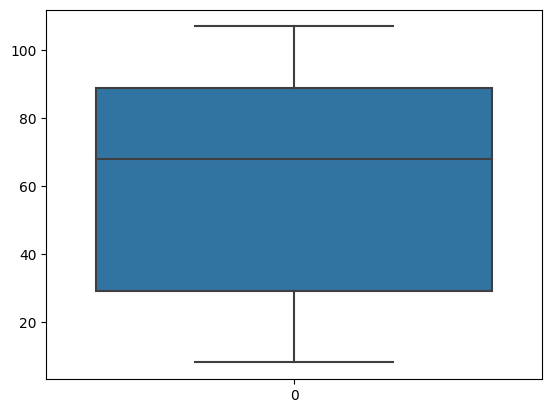

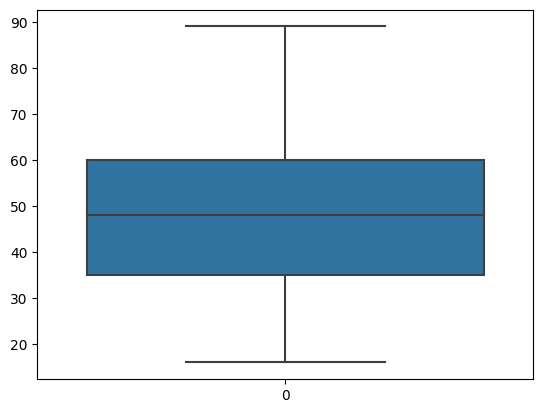

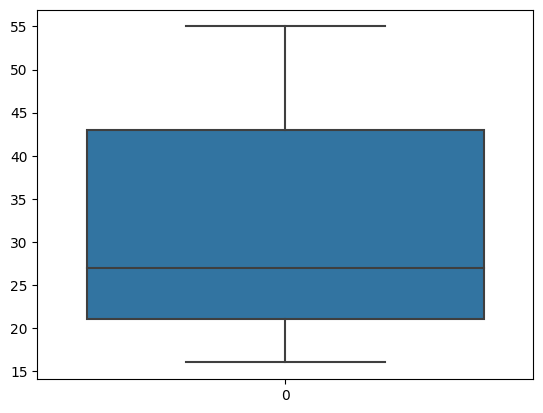

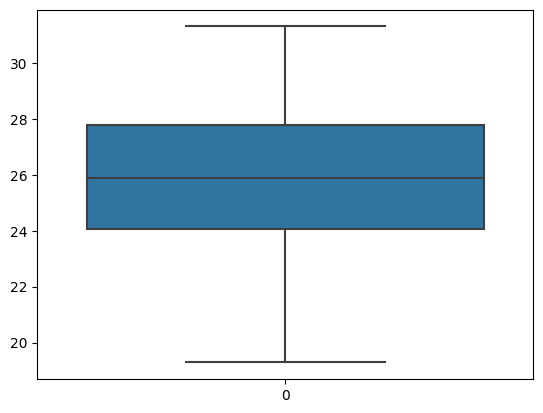

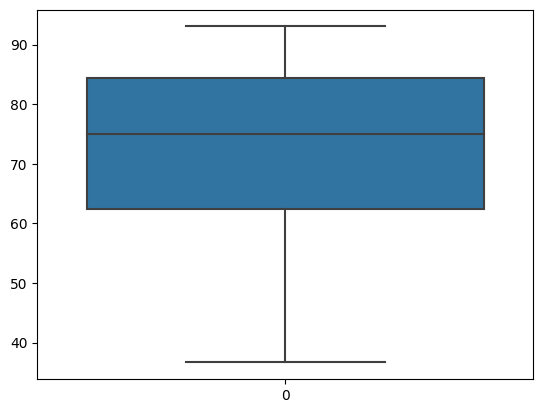

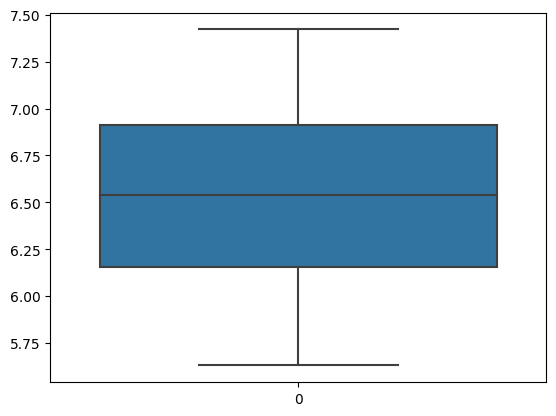

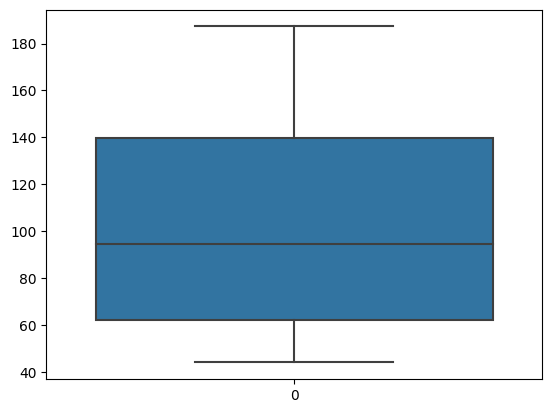

In [90]:
for column in datax_nuevo.columns:
    plt.figure()
    sbn.boxplot(datax_nuevo[column])
    plt.show()

/home/simon/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


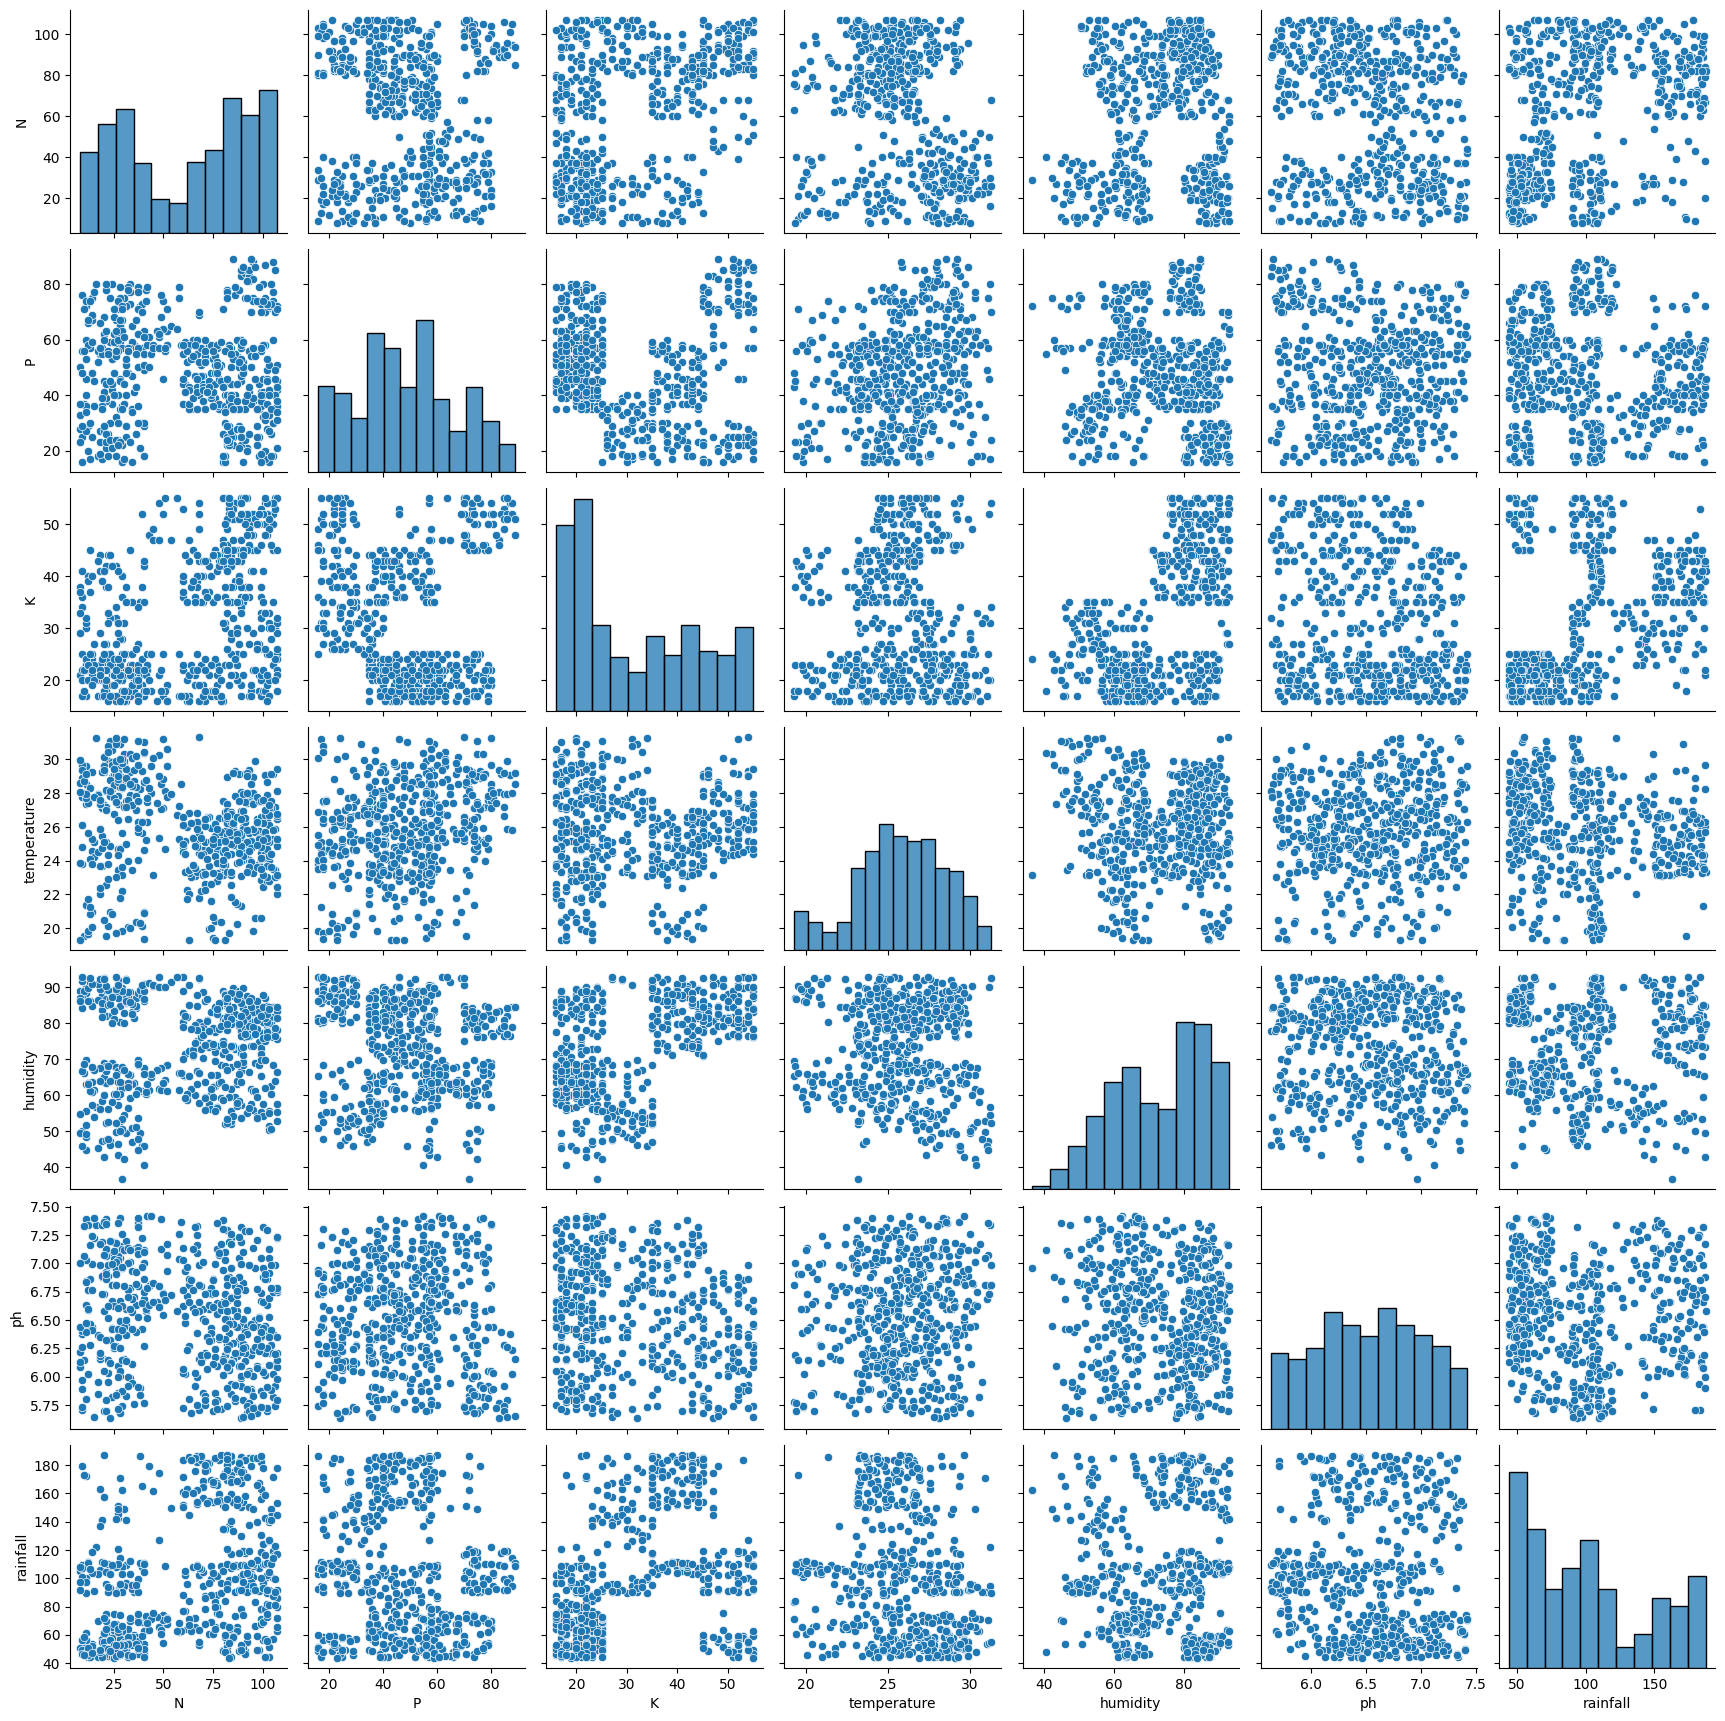

In [91]:
sbn.pairplot(datax_nuevo)

<Axes: >

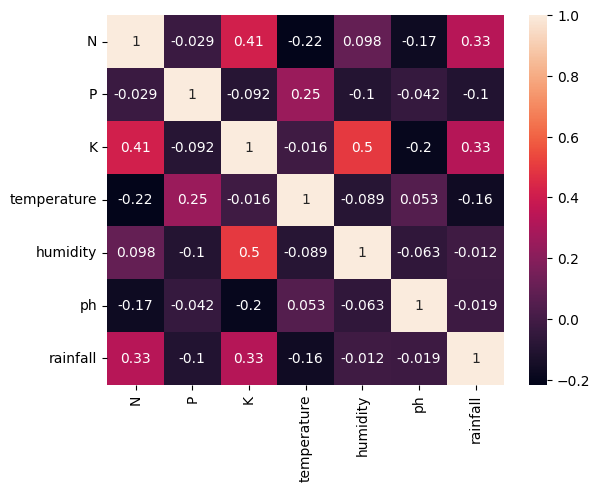

In [92]:
sbn.heatmap(datax_nuevo.corr(), annot=True)

In [93]:
datax_nuevo

,N,P,K,temperature,humidity,ph,rainfall
0,93.0,56.0,36.0,24.014976,82.056872,6.984354,185.277339
1,89.0,45.0,36.0,21.325042,80.474764,6.442475,185.497473
2,91.0,35.0,38.0,24.897282,80.525861,6.134287,183.679321
3,99.0,41.0,36.0,24.458021,82.748356,6.738652,182.561632
4,68.0,57.0,43.0,26.088679,80.379799,5.706943,182.904350
...,...,...,...,...,...,...,...
526,99.0,16.0,30.0,23.526521,65.443409,6.392792,186.172820
527,103.0,40.0,30.0,27.309018,55.196224,6.348316,141.483164
528,97.0,35.0,26.0,24.914610,53.741447,6.334610,166.254931
529,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
